# **DETAILS**





   **NAME** : R.SANJAY

   **EMAIL** : sanjay.r030303@gmail.com

**DOMAIN** : DataScience

 **INSTRUCTOR** : Sahil **Rahman**

**PROJECT TITLE** : Flower Recognition / Detection




# **ABSTRACT**
This project is flower recognition/Detection . This tell the flower name based on the user input . These Type of projects will help to understand about the Neural Network and How its work

# IMPORTING THE LIBRARIES

In [2]:
import os
import zipfile
import numpy as np
import cv2
import shutil
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# **Defining the Dataset**

link : https://drive.google.com/drive/folders/180ihV2TuLXwsMwvbktJr-wDCgfkYGQH_?usp=sharing

**PLEASE GIVE CORRECT DIRECTORY LOCATION**

In [3]:
data_directory ="/content/drive/MyDrive/Project 2 Dataset" # directory 

In [4]:
print(os.listdir("/content/drive/MyDrive/Project 2 Dataset")) #showing the directory inside data_directory

['40111136-id-card.pdf', 'Daisy', 'Tulip', 'Dandelion', 'Sunflower', 'Rose']


Defining the Image Properties

In [5]:
batch_size = 32
img_height = 180
img_width = 180

splitting Dataset - 80% for training and 20% for validation

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4467 files belonging to 5 classes.
Using 3574 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4467 files belonging to 5 classes.
Using 893 files for validation.


The order of the class name is alphabet order

In [8]:
class_names = train_ds.class_names
print(class_names)
# This will arrange the class names in alphabetical order

['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']


# **Visualizing the Data**

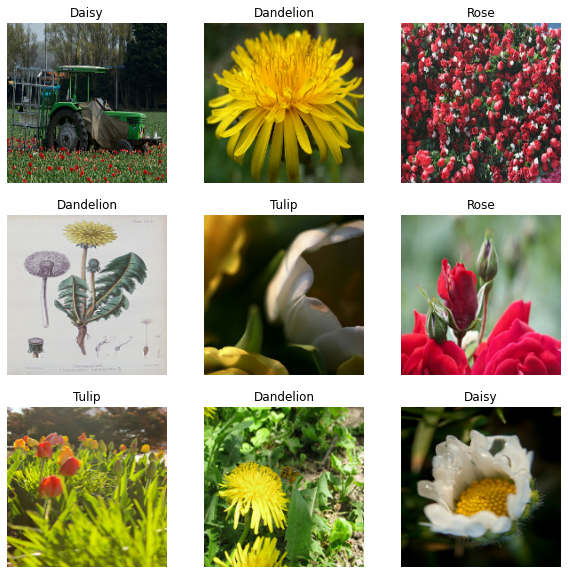

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 . The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

**Configure the dataset for performance:**

doing buffered prefetching.With this we can yield data from disk without having i/o become blocking

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Standardize the data:

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general we should seek to make our input values small. Here,  we standardize values to be in the [0, 1] range by using a Rescaling layer.

In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


**Create the model:**

In [14]:
num_classes = 5
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

compile the model:

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
112/112 [==============================] - 213s 2s/step - loss: 1.3459 - accuracy: 0.4239 - val_loss: 1.1636 - val_accuracy: 0.5218
Epoch 2/10
112/112 [==============================] - 3s 25ms/step - loss: 1.0361 - accuracy: 0.5965 - val_loss: 1.0362 - val_accuracy: 0.5946
Epoch 3/10
112/112 [==============================] - 3s 24ms/step - loss: 0.9196 - accuracy: 0.6461 - val_loss: 0.9938 - val_accuracy: 0.6170
Epoch 4/10
112/112 [==============================] - 3s 25ms/step - loss: 0.8181 - accuracy: 0.6891 - val_loss: 0.9426 - val_accuracy: 0.6439
Epoch 5/10
112/112 [==============================] - 3s 25ms/step - loss: 0.6980 - accuracy: 0.7356 - val_loss: 0.9664 - val_accuracy: 0.6338
Epoch 6/10
112/112 [==============================] - 3s 25ms/step - loss: 0.5937 - accuracy: 0.7694 - val_loss: 0.9943 - val_accuracy: 0.6193
Epoch 7/10
112/112 [==============================] - 3s 25ms/step - loss: 0.4806 - accuracy: 0.8206 - val_loss: 1.1242 - val_accuracy: 0.6282

Visualize training results:

Create plots of loss and accuracy on the training and validation sets.

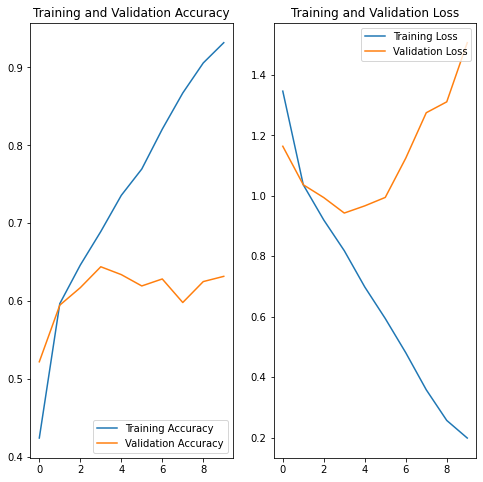

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Overfitting:**

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable . It is a sign of overfitting.

**Data augmentation:**

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

Here we will implement data augmentation using the layers from tf.keras.layers.experimental.preprocessing. These can be included inside our model like other layers, and run on the GPU.

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Few augmented examples

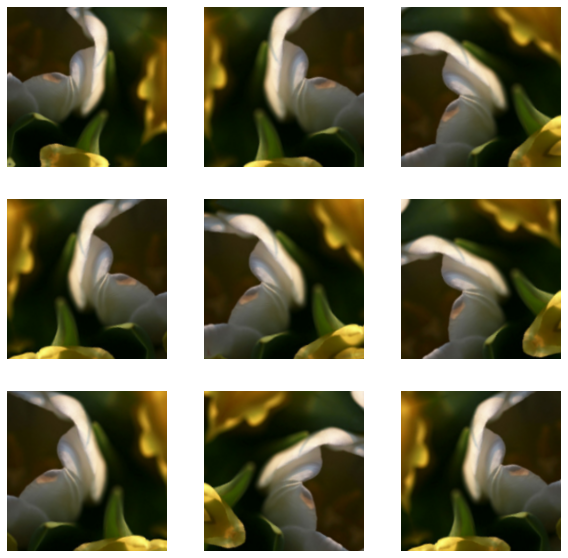

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**Dropout:**

It is also a technique for reducing a overfitting

**Creating Neural Network using layers**

In [20]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
112/112 [==============================] - 5s 41ms/step - loss: 1.3285 - accuracy: 0.4356 - val_loss: 1.1698 - val_accuracy: 0.5308
Epoch 2/20
112/112 [==============================] - 4s 39ms/step - loss: 1.0905 - accuracy: 0.5705 - val_loss: 1.0577 - val_accuracy: 0.5767
Epoch 3/20
112/112 [==============================] - 4s 39ms/step - loss: 0.9908 - accuracy: 0.6161 - val_loss: 1.0390 - val_accuracy: 0.5980
Epoch 4/20
112/112 [==============================] - 4s 39ms/step - loss: 0.9298 - accuracy: 0.6405 - val_loss: 1.0783 - val_accuracy: 0.5789
Epoch 5/20
112/112 [==============================] - 4s 39ms/step - loss: 0.8987 - accuracy: 0.6584 - val_loss: 0.9661 - val_accuracy: 0.6372
Epoch 6/20
112/112 [==============================] - 4s 39ms/step - loss: 0.8598 - accuracy: 0.6670 - val_loss: 0.9228 - val_accuracy: 0.6495
Epoch 7/20
112/112 [==============================] - 4s 39ms/step - loss: 0.8275 - accuracy: 0.6813 - val_loss: 0.9198 - val_accuracy: 0.6495

Visualize training results:

After applying data augmentation and Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned.

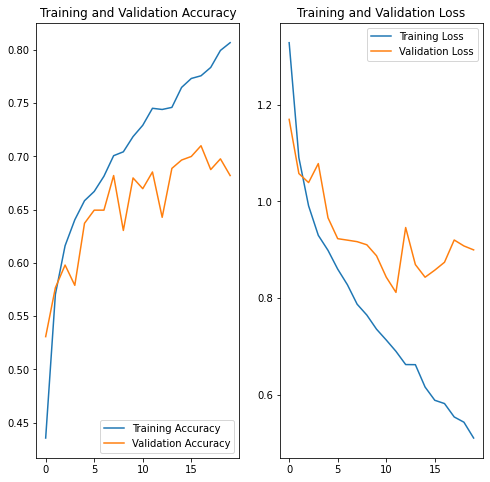

In [24]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Creating a interface for a user to give input** 

**NOTE** : upload the image file and get a output

# **Steps to Run**
**Step1 : Run the below section and upload the flower image**

**Step2 : Run the next section after image upload.**

In [25]:
import numpy as np

from google.colab import files
import keras.utils as image

uploaded=files.upload()


Saving 5547758_eea9edfd54_n.jpg to 5547758_eea9edfd54_n.jpg


In [26]:
for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(180, 180))
  
  x=image.img_to_array(img)
  test_img=np.expand_dims(x, axis=0)
  
  
  result = model.predict(test_img)
  pred = np.argmax(result) # get the index of max value

  if pred == 0:
    print("Daisy")
  elif pred == 1:
    print("Dandelion")
  elif pred == 2:
    print("Rose")
  elif pred == 3:
    print("Sunflower")
  else:
    print("Tupil")

1/1 [==============================] - 0s 411ms/step
Daisy


In [26]:
# its showing correct picture name

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pickle
fname = 'ModelName.pkl'
pickle.dump(model, open(fname, 'wb'))

# **RESULT :**

This project is Done by me with a detailed Analysis and Prediction.The Above model is trained well and getting better accuracy. I also watched Many tutorial videos for refernce and done the project based on Sahil Rahman sir teaching and youtube tutorial videos . Thanks for Sahil Rahman sir and Devtown for teaching me a depth of DataScience Course





In [28]:
#THANKYOU